In [27]:
import numpy as np
import matplotlib.pyplot as plt

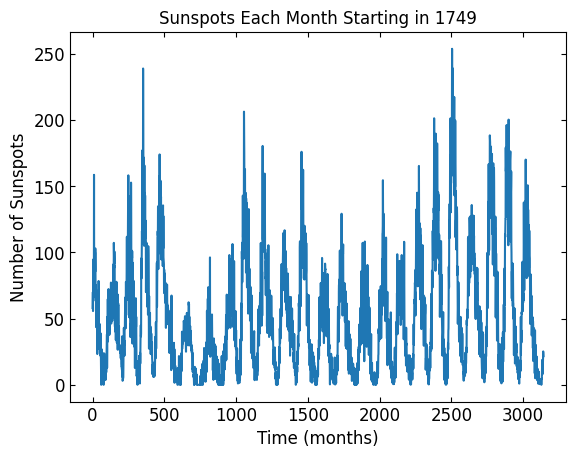

In [28]:
data = np.loadtxt(r"/content/sunspots.txt", usecols=(0,1))

month = data[:, 0]
sunspots = data[:, 1]

plt.plot(month,sunspots)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("Time (months)",fontsize = 12)
plt.ylabel("Number of Sunspots", fontsize = 12)
plt.title("Sunspots Each Month Starting in 1749",fontsize = 12)
plt.savefig("Sunspots-fig")
plt.show()

In [29]:
from numpy import zeros
from cmath import exp,pi

def dft(y):
  N = len(y)
  c = zeros(N//2+1,complex)
  k_s = []
  for k in range(N//2+1):
    k_s.append(k)
    for n in range(N):
      c[k] += y[n]*exp(-2j*pi*k*n/N)
  return c,k_s

c,k_s = dft(sunspots)




In [30]:
print(month)

[0.000e+00 1.000e+00 2.000e+00 ... 3.140e+03 3.141e+03 3.142e+03]


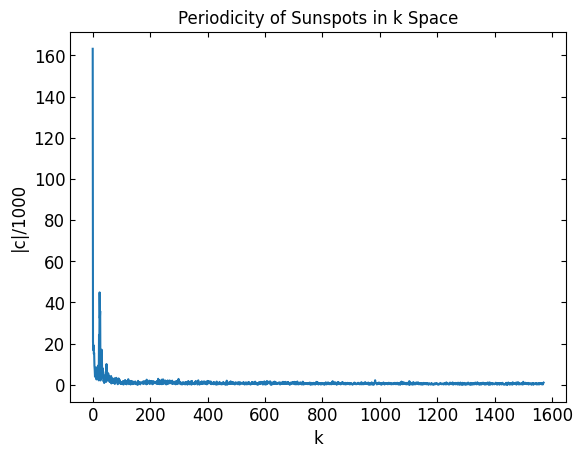

In [31]:
plt.plot(k_s,abs(c)/1000)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("k",fontsize = 12)
plt.ylabel("|c|/1000", fontsize = 12)
plt.title("Periodicity of Sunspots in k Space",fontsize = 12)
plt.savefig("Sunspots-psd")
plt.show()
#plt.xlim(0,500)

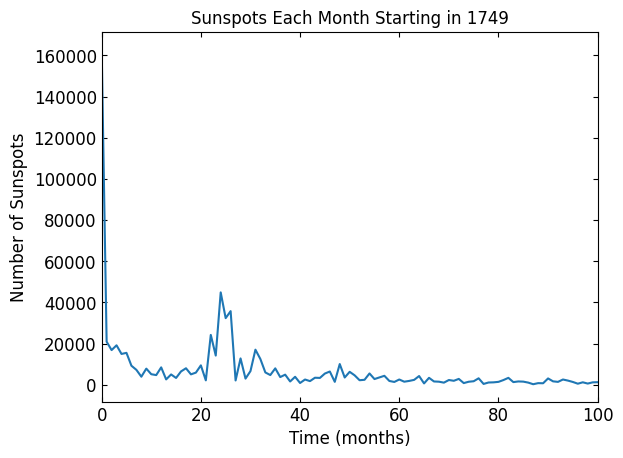

In [32]:
plt.plot(k_s,abs(c))
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("Time (months)",fontsize = 12)
plt.ylabel("Number of Sunspots", fontsize = 12)
plt.title("Sunspots Each Month Starting in 1749",fontsize = 12)
plt.savefig("Sunspots-psd")
plt.xlim(0,100)
plt.show()

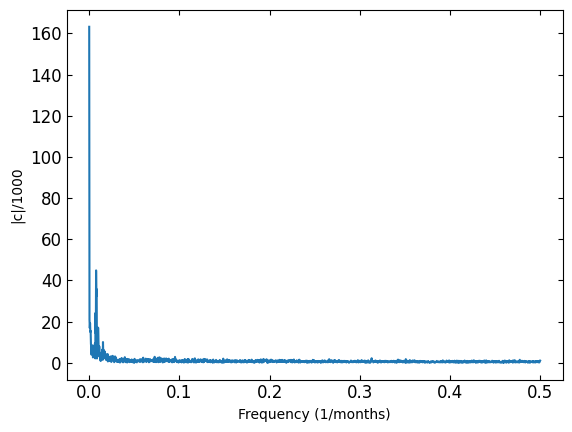

In [33]:
freqs = [k / len(sunspots) for k in k_s]  # cycles per month
plt.plot(freqs, abs(c)/1000)
plt.xlabel("Frequency (1/months)")
plt.ylabel("|c|/1000")
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)


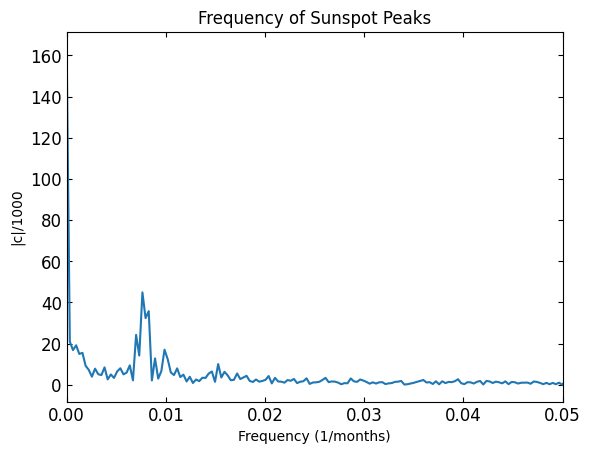

In [34]:
freqs = [k / len(sunspots) for k in k_s]  # cycles per month
plt.plot(freqs, abs(c)/1000)
plt.xlabel("Frequency (1/months)")
plt.ylabel("|c|/1000")
plt.xlim(0,0.05)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.title("Frequency of Sunspot Peaks")
plt.savefig("sunspot-freq-adjusted")

In [35]:
#7.4

data1 = np.loadtxt(r"/content/dow.txt",float)
print(data1)


[12121.71 12136.44 12226.73 ... 11499.25 11491.91 11478.13]


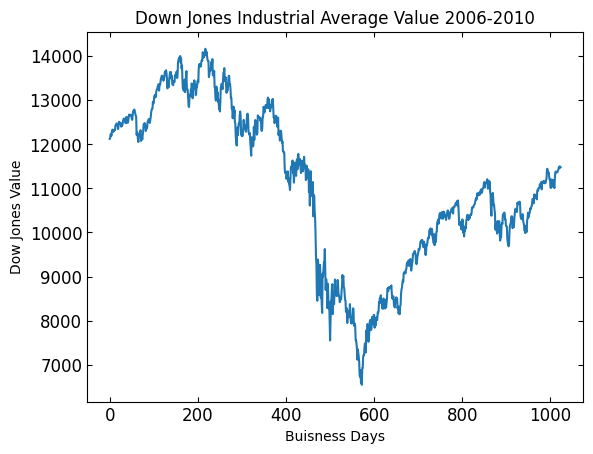

In [36]:
plt.plot(data1)
plt.tick_params(axis='both', which='both', direction='in',labelsize = "12", top=True, right=True)
plt.xlabel("Buisness Days")
plt.ylabel("Dow Jones Value")
plt.title("Down Jones Industrial Average Value 2006-2010")
plt.savefig("dow_value")

In [37]:
from numpy.fft import rfft, irfft
c_1 = rfft(data1)


In [38]:
print(len(c_1))
print(len(c_1)//10)
ten_p = len(c_1)//10
#print(c_1)

513
51


In [39]:
c_1_10p = []

index = 0
while index < len(c_1):
  if index >= ten_p:
    c_1_10p.append(0)
  else:
    c_1_10p.append(c_1[index])
  index += 1

In [40]:
print(c_1_10p)

[np.complex128(11283903.94+0j), np.complex128(684127.7397908096-955087.519147793j), np.complex128(-419226.2051224315+92908.95615824783j), np.complex128(74190.14983157624-273812.25003958464j), np.complex128(-35185.6810522086+72365.8612883754j), np.complex128(111482.64279390482-31477.98068910474j), np.complex128(21675.282403753787-24575.154921948808j), np.complex128(11122.44159803355+24797.57044774214j), np.complex128(31188.46645185393+22786.82096781559j), np.complex128(7385.2310202512235-32123.342663193467j), np.complex128(-33961.59717675771-107833.05229796973j), np.complex128(-12356.956915994986+27317.127626127876j), np.complex128(21383.731525067535-91668.4146922765j), np.complex128(-43244.172463210474+99229.45404652599j), np.complex128(-3557.5351836624195-25497.27430711556j), np.complex128(-30436.767716270653-17255.11507923405j), np.complex128(-9317.996104503418-24929.765816146824j), np.complex128(-9350.333250810147-17561.230198280242j), np.complex128(11741.80616377706+20923.536961960

In [41]:
new_data = irfft(c_1_10p)


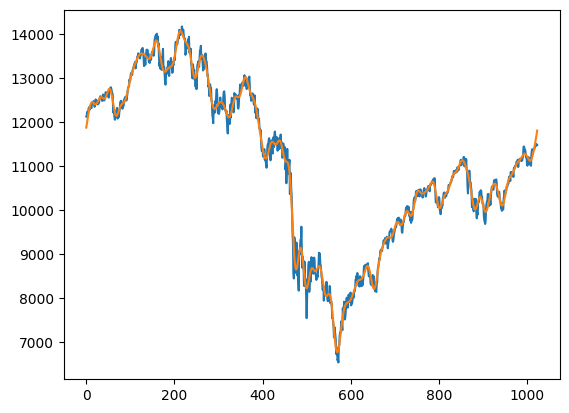

In [42]:

plt.plot(data1)
plt.plot(new_data)

In [43]:
two_p = len(c_1)//50
c_1_2p = []

index = 0
while index < len(c_1):
  if index >= two_p:
    c_1_2p.append(0)
  else:
    c_1_2p.append(c_1[index])
  index += 1

In [44]:
new_data_2 = irfft(c_1_2p)

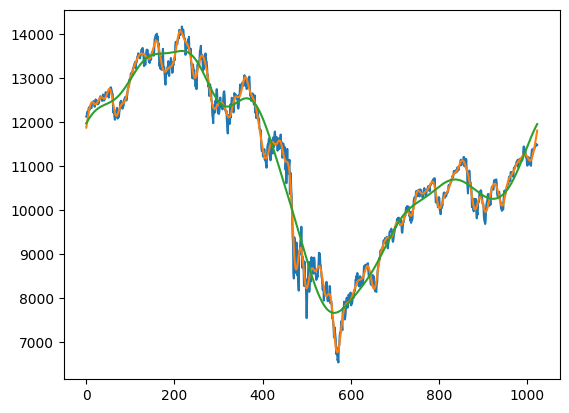

In [45]:
plt.plot(data1)
plt.plot(new_data)
plt.plot(new_data_2)

In [46]:
blur = []

with open(r"/content/blur2.txt", "r") as f:
    for line in f:
        nums = line.split()
        blur.append(nums)


In [47]:
rows = len(blur)
cols = len(blur[0]) if rows > 0 else 0

print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 1024
Columns: 1024


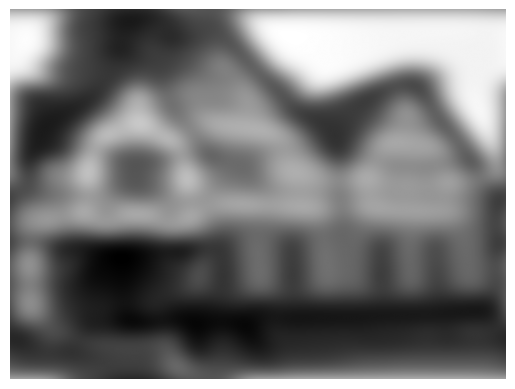

In [48]:
import matplotlib.pyplot as plt
import numpy as np

blur = []

with open(r"/content/blur2.txt", "r") as f:
    for line in f:
        nums = line.split()
        blur.append(nums)



data = np.array(blur, dtype=float)
data = np.flipud(data)
plt.imshow(data, cmap='gray', origin='lower', aspect='auto')

plt.xlabel('Column')
plt.ylabel('Row')
plt.axis('off')
plt.savefig("blurred_image")
plt.show()


In [49]:
from numpy.fft import rfft2, irfft2

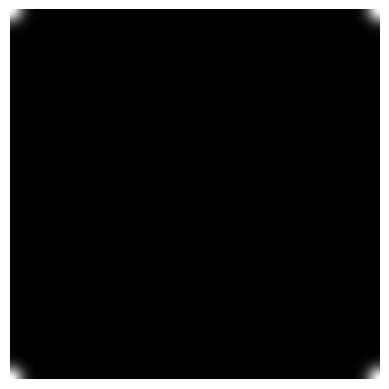

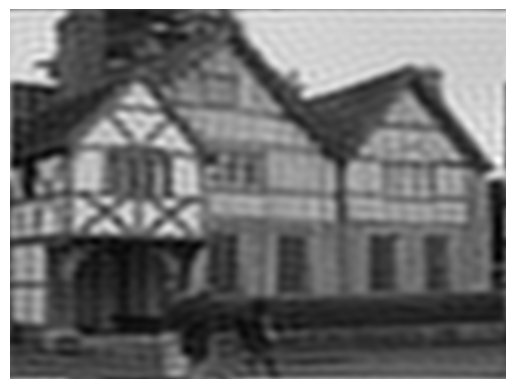

In [52]:
from matplotlib.patches import Rectangle
def gaussian_val(x,y):
  sigma = 25
  val = np.exp(-(x**2 + y**2)/(2*sigma**2))
  return val

gaussian = np.zeros((1024, 1024), dtype=float)

row_num = 0
col_num = 0
for row in gaussian:
  col_num = 0
  for num in row:
    value = max(gaussian_val(col_num,row_num),gaussian_val(col_num-1024,row_num),gaussian_val(col_num-1024,row_num-1024),gaussian_val(col_num,row_num-1024))
    gaussian[row_num,col_num] = value
    col_num += 1
  row_num += 1
plt.imshow(gaussian,cmap = "gray")
plt.axis('off')
rect = Rectangle((0,0), gaussian.shape[1], gaussian.shape[0], linewidth=10, edgecolor='black', facecolor='none')
plt.savefig("gaussian-spread")
plt.show()
min = 1e-2
result_fft = np.zeros_like(gaussian, dtype=complex)


blur = np.array(blur,dtype = float)
blur_fft = rfft2(gaussian)
pic_fft = rfft2(blur)

rows, cols = blur_fft.shape
for i in range(rows):
    for j in range(cols):
        if np.abs(blur_fft[i, j]) > min:
            result_fft[i, j] = pic_fft[i, j] / blur_fft[i, j]
        else:
            result_fft[i, j] = pic_fft[i, j]
result = irfft2(result_fft)
result = np.flipud(result)

plt.imshow(result, cmap='gray', origin='lower', aspect='auto')
#plt.colorbar(label='Value')
#plt.title('Deconvolved Image')
#plt.xlabel('Column')
#plt.ylabel('Row')
rect = Rectangle((0,0), gaussian.shape[1], gaussian.shape[0], linewidth=3, edgecolor='black', facecolor='none')
plt.axis('off')
plt.savefig("deblurred_image")
plt.show()
